# Data Preprocessing

## First we will import necessary libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as K

## Now we'll load our dataset using the datasets method in keras

In [31]:
(X_train, Y_train), (X_test, Y_test) = K.datasets.cifar10.load_data()

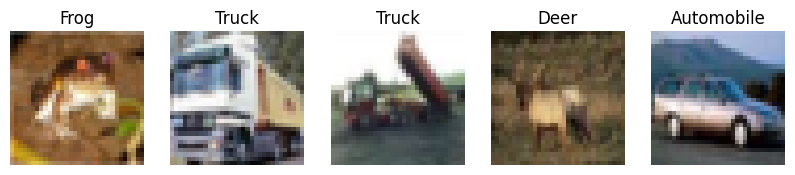

In [32]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display images with labels
def display_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        # Convert images to uint8 if necessary
        if images[i].dtype != 'uint8':
            img = images[i].astype('uint8')
        else:
            img = images[i]
        plt.imshow(img)
        # Extract scalar from labels[i]
        label_index = int(labels[i].item())
        plt.title(class_names[label_index])
        plt.axis('off')
    plt.show()

display_images(X_train, Y_train, class_names)

In [33]:
def preprocess_data(X, Y):
    """
    Pre-processes the data for the model.

    Args:
        X (numpy.ndarray): The CIFAR 10 data of shape (m, 32, 32, 3).
        Y (numpy.ndarray): The CIFAR 10 labels of shape (m,).

    Returns:
        X_p (numpy.ndarray): Preprocessed X.
        Y_p (numpy.ndarray): Preprocessed Y.
    """
    X_p = X.astype('float32')
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p

In [38]:
X_train_p, Y_train_p = preprocess_data(X_train, Y_train)

ValueError: num must be an integer with 1 <= num <= 6, not 7

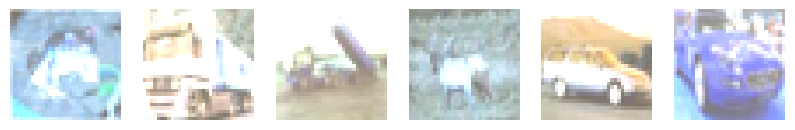

In [48]:
def display_preprocessed_images(images):
    plt.figure(figsize=(10, 2))
    for i in range(len(images)):
        plt.subplot(1, 6, i+1)
        # Revert preprocessing for visualization
        img = images[i].copy()
        # ResNet50 preprocess_input subtracts mean RGB values
        img[..., 0] += 103.939  # B channel
        img[..., 1] += 116.779  # G channel
        img[..., 2] += 123.68   # R channel
        img = img[..., ::-1]    # Convert BGR to RGB
        # Ensure pixel values are in [0, 255] and of type uint8
        img = np.clip(img, 0, 255).astype('uint8')
        plt.imshow(img)
        plt.axis('off')
    plt.show()
display_preprocessed_images(X_train_p)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load and preprocess data
(X_train, Y_train), (X_test, Y_test) = K.datasets.cifar10.load_data()

# Preprocess data
def preprocess_data(X, Y):
    X_p = X.astype('float32')
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p

X_train_p, Y_train_p = preprocess_data(X_train, Y_train)

# Resize images to 224x224
resized_images = K.layers.Resizing(224, 224)(X_train_p).numpy()

# Apply preprocess_input
preprocessed_images = preprocess_input(resized_images)

# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Updated compare_images function
def compare_images(original_images, preprocessed_images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i+1)
        img_original = original_images[i]
        if img_original.dtype != 'uint8':
            img_original = img_original.astype('uint8')
        else:
            img_original = img_original.copy()
        plt.imshow(img_original)
        label_index = int(labels[i])
        plt.title('Prepocessed\n' + class_names[label_index])
        plt.axis('off')
        
        # Preprocessed image
        plt.subplot(2, num_images, num_images + i +1)
        # Revert preprocessing for visualization
        img = preprocessed_images[i].copy()
        img[..., 0] += 103.939
        img[..., 1] += 116.779
        img[..., 2] += 123.68
        img = img[..., ::-1]
        img = np.clip(img, 0, 255).astype('uint8')
        plt.imshow(img)
        plt.title('Original')
        plt.axis('off')
    plt.show()

# Call the function
compare_images(resized_images, preprocessed_images, Y_train.squeeze(), class_names)